In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the desired number of sides (try changing this value!)
n_sides = 6

# Represent a dice by using a numpy array
dice = np.arange(n_sides) + 1

dice

array([1, 2, 3, 4, 5, 6])

In [3]:
# Run this cell multiple times (every time you should get a different result at random)
np.random.choice(dice)

4

In [4]:
# Roll the dice 20 times
n_rolls = 20

# Save the result of each roll
rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

rolls

array([1, 5, 3, 6, 2, 5, 2, 6, 1, 6, 1, 4, 2, 2, 3, 3, 3, 4, 2, 5])

In [5]:
# Compute mean of 20 rolls
m = np.mean(rolls)

# Compute variance of 20 rolls
v = np.var(rolls)

print(f"mean of rolls: {m:.2f}\nvariance of rolls: {v:.2f}")

mean of rolls: 3.30
variance of rolls: 2.81


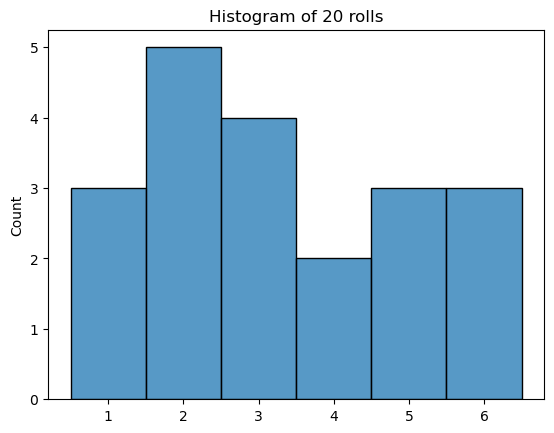

In [6]:
# Display histogram of 20 rolls
n_rolls_hist = sns.histplot(rolls, discrete=True)
n_rolls_hist.set(title=f"Histogram of {n_rolls} rolls")
plt.show()

mean of rolls: 3.48
variance of rolls: 2.90


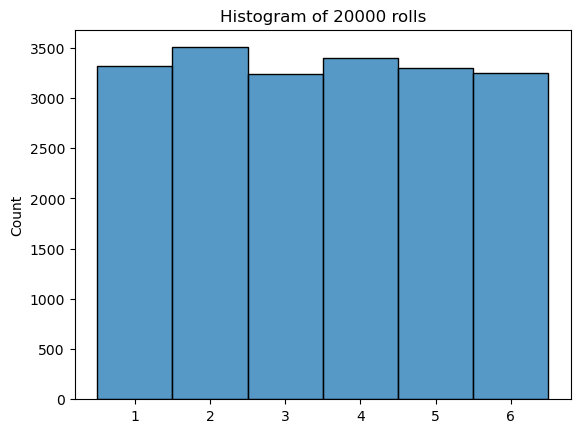

In [7]:
n_rolls = 20_000

rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

print(f"mean of rolls: {np.mean(rolls):.2f}\nvariance of rolls: {np.var(rolls):.2f}")

n_rolls_hist = sns.histplot(rolls, discrete=True)
n_rolls_hist.set(title=f"Histogram of {n_rolls} rolls")
plt.show()

mean of first_rolls: 3.49
variance of first_rolls: 2.91

mean of second_rolls: 3.52
variance of second_rolls: 2.89

mean of sum_of_rolls: 7.01
variance of sum_of_rolls: 5.81

covariance between first and second roll:
[[2.90650626 0.00524932]
 [0.00524932 2.89349345]]


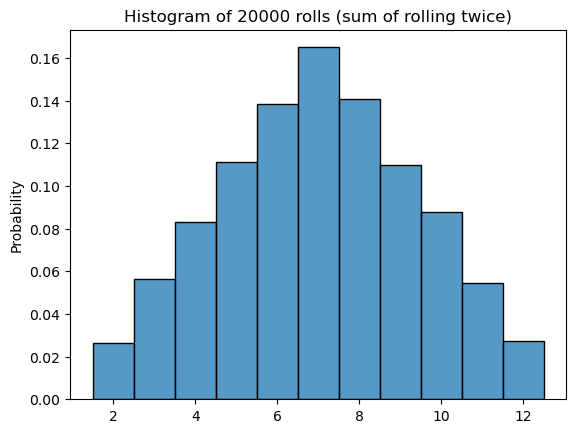

In [8]:
n_rolls = 20_000

# First roll (same as before)
first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Second roll (code is the same but saved in a new numpy array)
second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Sum both rolls (this is easy since numpy allows vectorization)
sum_of_rolls = first_rolls + second_rolls

# Print mean, variance and covariance
print(
    f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n"
)
print(
    f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n"
)
print(
    f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n"
)
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
sum_2_rolls_hist = sns.histplot(sum_of_rolls, stat="probability", discrete=True)
sum_2_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (sum of rolling twice)")
plt.show()

In [9]:
def load_dice(n_sides, loaded_number):
    # All probabilities are initially the same
    probs = np.array([1 / (n_sides + 1) for _ in range(n_sides)])

    # Assign the loaded side a probability that is twice as the other ones
    probs[loaded_number - 1] = 1 - sum(probs[:-1])

    # Check that all probabilities sum up to 1
    if not np.isclose(sum(probs), 1):
        print("All probabilities should add up to 1")
        return

    return probs

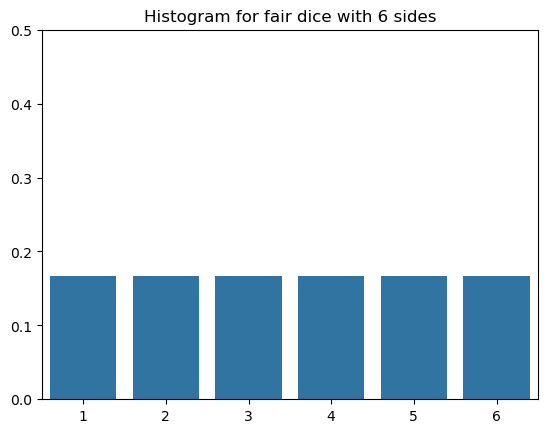

In [10]:
# Compute same probabilities for every side
probs_fair_dice = np.array([1 / n_sides] * n_sides)

# Plot probabilities
fair_dice_sides = sns.barplot(x=dice, y=probs_fair_dice)
fair_dice_sides.set(title=f"Histogram for fair dice with {n_sides} sides")
fair_dice_sides.set_ylim(0, 0.5)
plt.show()

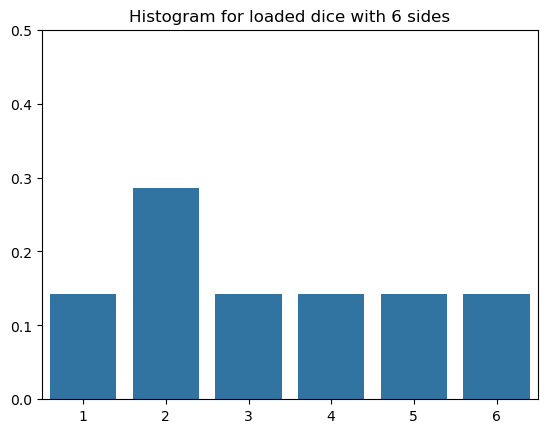

In [11]:
# Get probabilities if dice is loaded towards side 2
probs_loaded_dice = load_dice(n_sides, loaded_number=2)

# Plot probabilities
loaded_dice_sides = sns.barplot(x=dice, y=probs_loaded_dice)
loaded_dice_sides.set(title=f"Histogram for loaded dice with {n_sides} sides")
loaded_dice_sides.set_ylim(0, 0.5)
plt.show()

mean of first_rolls: 3.28
variance of first_rolls: 2.76

mean of second_rolls: 3.30
variance of second_rolls: 2.79

mean of sum_of_rolls: 6.58
variance of sum_of_rolls: 5.54

covariance between first and second roll:
[[ 2.76223186 -0.00784702]
 [-0.00784702  2.79015841]]


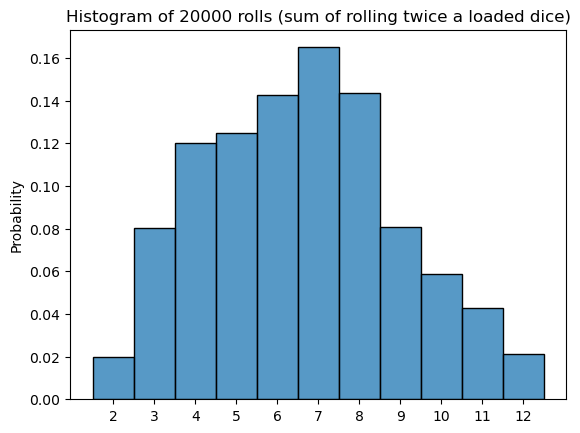

In [12]:
n_rolls = 20_000

# Notice that the p parameter is being set
first_rolls = np.array(
    [np.random.choice(dice, p=probs_loaded_dice) for _ in range(n_rolls)]
)

second_rolls = np.array(
    [np.random.choice(dice, p=probs_loaded_dice) for _ in range(n_rolls)]
)

sum_of_rolls = first_rolls + second_rolls

print(
    f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n"
)
print(
    f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n"
)
print(
    f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n"
)
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
loaded_rolls_hist = sns.histplot(sum_of_rolls, stat="probability", discrete=True)
loaded_rolls_hist.set(
    title=f"Histogram of {n_rolls} rolls (sum of rolling twice a loaded dice)"
)
loaded_rolls_hist.set_xticks(range(min(sum_of_rolls), max(sum_of_rolls) + 1))
plt.show()

mean of first_rolls: 3.51
variance of first_rolls: 2.94

mean of second_rolls: 1.76
variance of second_rolls: 4.55

mean of sum_of_rolls: 5.27
variance of sum_of_rolls: 12.79

covariance between first and second roll:
[[2.93757527 2.65166086]
 [2.65166086 4.5528022 ]]


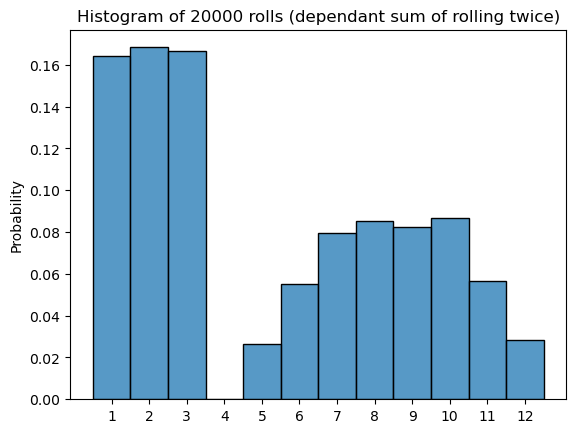

In [13]:
n_rolls = 20_000

first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Preserve the result of the second throw only if the first roll was greater or equal to 4
second_rolls = np.where(first_rolls >= 4, second_rolls, 0)

sum_of_rolls = first_rolls + second_rolls

print(
    f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n"
)
print(
    f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n"
)
print(
    f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n"
)
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
dependant_rolls_hist = sns.histplot(sum_of_rolls, stat="probability", discrete=True)
dependant_rolls_hist.set(
    title=f"Histogram of {n_rolls} rolls (dependant sum of rolling twice)"
)
dependant_rolls_hist.set_xticks(range(min(sum_of_rolls), max(sum_of_rolls) + 1))
plt.show()